#Insurance Claims Charges Prediction

Download dataset

In [3]:
!wget https://raw.githubusercontent.com/alexjolly28/entri_DSML/main/resources/insurance.csv

--2023-12-28 17:25:50--  https://raw.githubusercontent.com/alexjolly28/entri_DSML/main/resources/insurance.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 55628 (54K) [text/plain]
Saving to: ‘insurance.csv’

insurance.csv       100%[===================>]  54.32K  --.-KB/s    in 0.01s   

2023-12-28 17:25:50 (4.79 MB/s) - ‘insurance.csv’ saved [55628/55628]



##STEP-1: Importing Libraries & Data Set

In [4]:
#import basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [6]:
#Read the Data
Data = pd.read_csv("insurance.csv")

##STEP-2:Exploratory Data Analysis (EDA)

In [ ]:
# Descriptive stats
Data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
# Null check
Data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Visulizations

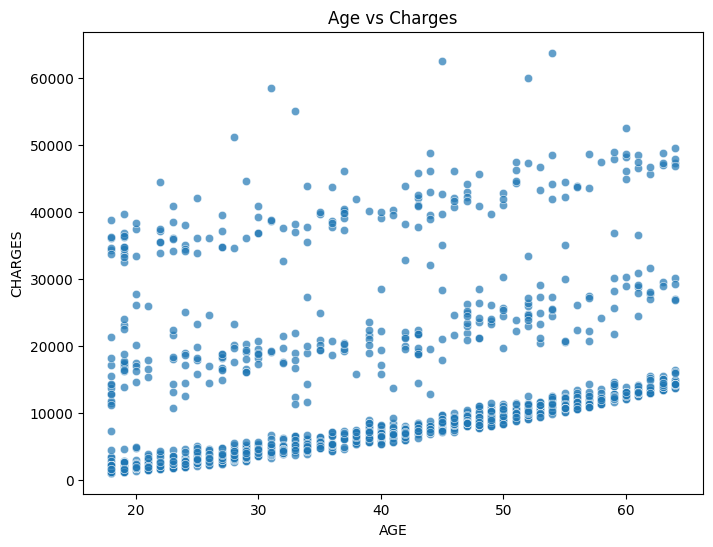

In [7]:
# Age vs Charges
# the more the age the more will be insurance charge
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
Data = pd.read_csv("insurance.csv")
plt.figure(figsize = (8,6))
sns.scatterplot(x = 'age',y = 'charges',data = Data, alpha = 0.7)
plt.title("Age vs Charges")
plt.xlabel("AGE")
plt.ylabel("CHARGES")
plt.show()

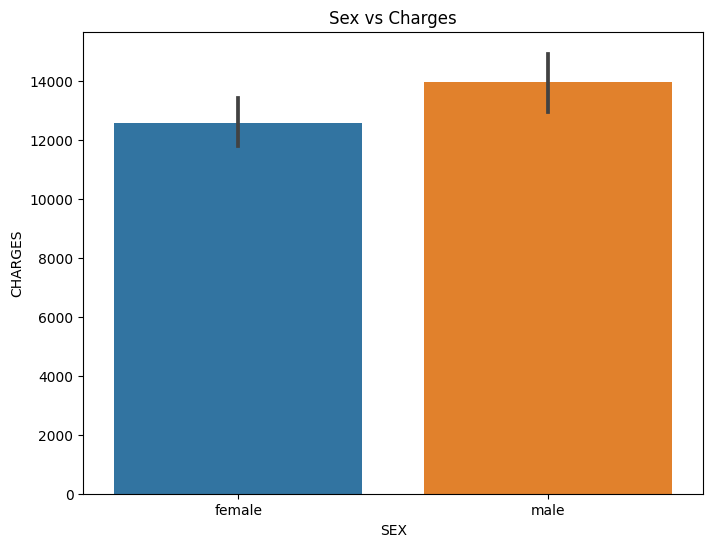

In [8]:
# sex vs charges
# males insurance charges more than females.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
Data = pd.read_csv("insurance.csv")
plt.figure(figsize = (8,6))
sns.barplot(x = 'sex',y = 'charges',data = Data,)
plt.title("Sex vs Charges")
plt.xlabel("SEX")
plt.ylabel("CHARGES")
plt.show()

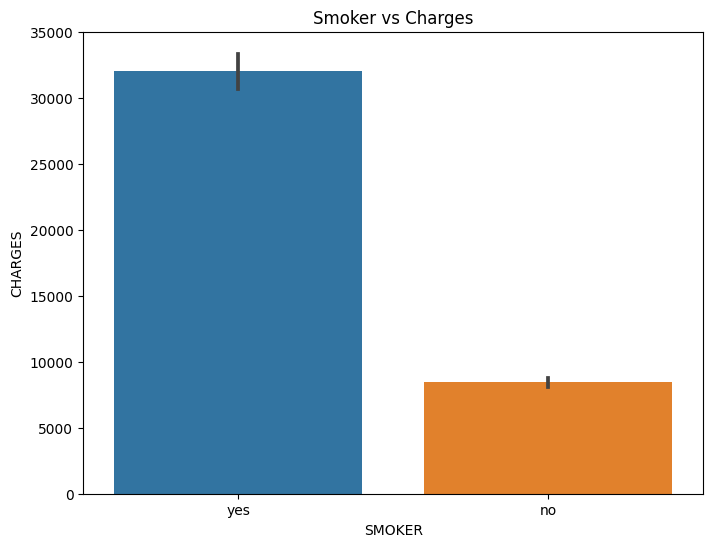

In [9]:
# smoker vs charges
# smokers have more insurance charges than the non smokers
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
Data = pd.read_csv("insurance.csv")
plt.figure(figsize = (8,6))
sns.barplot(x = 'smoker',y = 'charges',data = Data,)
plt.title("Smoker vs Charges")
plt.xlabel("SMOKER")
plt.ylabel("CHARGES")
plt.show()

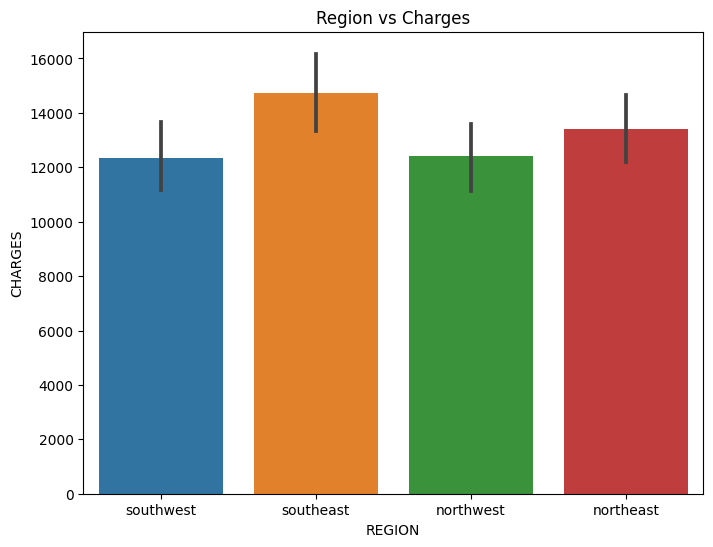

In [10]:
# region vs charges
# region actually does not play any role in determining the insurance charges
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
Data = pd.read_csv("insurance.csv")
plt.figure(figsize = (8,6))
sns.barplot(x = 'region',y = 'charges',data = Data,)
plt.title("Region vs Charges")
plt.xlabel("REGION")
plt.ylabel("CHARGES")
plt.show()

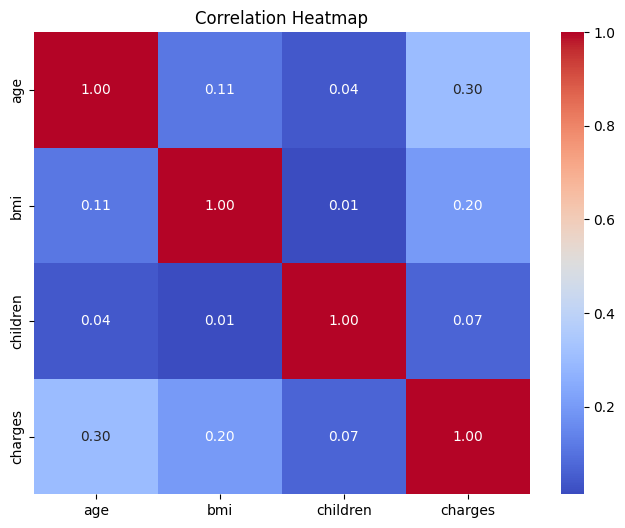

In [11]:
# plotting the correlation plot for the dataset
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
Data = pd.read_csv("insurance.csv")
corltnmtx = Data.corr()
plt.figure(figsize = (8,6))
sns.heatmap(corltnmtx,annot=True,cmap="coolwarm",fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

##STEP-3:Data Preprocessing / Clean the Data


In [12]:
# Label Encoding for sex and smoker
from sklearn.preprocessing import LabelEncoder
import pandas as pd
Data = pd.read_csv("insurance.csv")
print("Unique values in 'sex' column before encoding:", Data['sex'].unique())
print("Unique values in 'smoker' column before encoding:", Data['smoker'].unique())
Label_encoder = LabelEncoder()
Data['SEX'] = Label_encoder.fit_transform(Data['sex'])
Data['SMOKER'] = Label_encoder.fit_transform(Data['smoker'])
print("\nUnique values in 'sex_encoded' column after encoding : ",Data['SEX'].unique())
print("\nUnique values in 'smoker_encoded' column after encoding : ",Data['SMOKER'].unique())
print("\n\n Updated Dataframe : ")
print(Data.head())


Unique values in 'sex' column before encoding: ['female' 'male']
Unique values in 'smoker' column before encoding: ['yes' 'no']

Unique values in 'sex_encoded' column after encoding :  [0 1]

Unique values in 'smoker_encoded' column after encoding :  [1 0]


 Updated Dataframe : 
   age     sex     bmi  children smoker     region      charges  SEX  SMOKER
0   19  female  27.900         0    yes  southwest  16884.92400    0       1
1   18    male  33.770         1     no  southeast   1725.55230    1       0
2   28    male  33.000         3     no  southeast   4449.46200    1       0
3   33    male  22.705         0     no  northwest  21984.47061    1       0
4   32    male  28.880         0     no  northwest   3866.85520    1       0


In [ ]:
# removing unnecassary columns from the dataset
q=["sex","smoker","region"]
Data = Data.drop(columns=q)
print(Data.head())

   age     bmi  children      charges  SEX  SMOKER
0   19  27.900         0  16884.92400    0       1
1   18  33.770         1   1725.55230    1       0
2   28  33.000         3   4449.46200    1       0
3   33  22.705         0  21984.47061    1       0
4   32  28.880         0   3866.85520    1       0


In [13]:
#Selecting Independent (Features) & Dependent(Target) variables
import pandas as pd
Data = pd.read_csv("insurance.csv")
print("columns in the dataset ")
print(Data.columns)
Features = Data[['age','sex','bmi','children','smoker','region']]
Target = Data['charges']
print("selected features : ")
print(Features.head())
print("selected target : ")
print(Target.head())

columns in the dataset 
Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')
selected features : 
   age     sex     bmi  children smoker     region
0   19  female  27.900         0    yes  southwest
1   18    male  33.770         1     no  southeast
2   28    male  33.000         3     no  southeast
3   33    male  22.705         0     no  northwest
4   32    male  28.880         0     no  northwest
selected target : 
0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64


Splitting the dataset into the Training set and Test set

In [14]:
from sklearn.model_selection import train_test_split
import pandas as pd
Data = pd.read_csv("insurance.csv")
Features = Data[['age','sex','bmi','children','smoker','region']]
Target = Data['charges']
X_train , X_test , y_train , y_test = train_test_split(Features,Target,test_size = 0.2,random_state = 42)
print("Shape of Xtrain : ",X_train.shape)
print("Shape of Xtest : ",X_test.shape )
print("Shape of ytrain : ",y_train.shape)
print("Shape of ytest : ",y_test.shape )

Shape of Xtrain :  (1070, 6)
Shape of Xtest :  (268, 6)
Shape of ytrain :  (1070,)
Shape of ytest :  (268,)


##STEP-4 : Fit the Model & Predict , check the Accuracy

##Linear Regression

In [15]:
# creating the model
# feeding the training data to the model
# predicting the test set results
# calculating the mean squared error
# Calculating the root mean squared error
# Calculating the r2 score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd
Data = pd.read_csv('insurance.csv')
Features = Data[['age', 'sex', 'bmi', 'children', 'smoker', 'region']]
Target = Data['charges']
Features = pd.get_dummies(Features, drop_first=True)
X_train, X_test, y_train, y_test = train_test_split(Features, Target, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
MSE = mean_squared_error(y_test, y_pred)
rMSE = np.sqrt(MSE)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error (MSE): {MSE}")
print(f"Root Mean Squared Error (RMSE): {rMSE}")
print(f"R-squared score: {r2}")

Mean Squared Error (MSE): 33596915.85136145
Root Mean Squared Error (RMSE): 5796.284659276273
R-squared score: 0.7835929767120724


##Support Vector Machine

In [18]:
# creating the model
# feeding the training data to the model
# predicting the test set results
# calculating the mean squared error
# Calculating the root mean squared error
# Calculating the r2 score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.svm import SVR
import numpy as np
import pandas as pd
Data = pd.read_csv('insurance.csv')
Features = Data[['age', 'sex', 'bmi', 'children', 'smoker', 'region']]
Target = Data['charges']
Features = pd.get_dummies(Features, drop_first=True)
X_train, X_test, y_train, y_test = train_test_split(Features, Target, test_size=0.2, random_state=42)
model = SVR(kernel='linear')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
MSE = mean_squared_error(y_test, y_pred)
rMSE = np.sqrt(MSE)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error (MSE): {MSE}")
print(f"Root Mean Squared Error (RMSE): {rMSE}")
print(f"R-squared score: {r2}")

Mean Squared Error (MSE): 165994564.8489911
Root Mean Squared Error (RMSE): 12883.887800232937
R-squared score: -0.06921688347442001


##Decision Tree

In [19]:
# creating the model
# feeding the training data to the model
# predicting the test set results
# calculating the mean squared error
# Calculating the root mean squared error
# Calculating the r2 score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd
Data= pd.read_csv('insurance.csv')
Falsefeatures = Data[['age', 'sex', 'bmi', 'children', 'smoker', 'region']]
Target = Data['charges']
Features = pd.get_dummies(Features, drop_first=True)
X_train, X_test, y_train, y_test = train_test_split(Features, Target, test_size=0.2, random_state=42)
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
MSE = mean_squared_error(y_test, y_pred)
rMSE = np.sqrt(MSE)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error (MSE): {MSE}")
print(f"Root Mean Squared Error (RMSE): {rMSE}")
print(f"R-squared score: {r2}")


Mean Squared Error (MSE): 42446908.010150984
Root Mean Squared Error (RMSE): 6515.129162967606
R-squared score: 0.7265877305258355


##Random Forest

In [22]:
# creating the model
# feeding the training data to the model
# predicting the test set results
# calculating the mean squared error
# Calculating the root mean squared error
# Calculating the r2 score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd
Data = pd.read_csv('insurance.csv')
Features = Data[['age', 'sex', 'bmi', 'children', 'smoker', 'region']]
TabErrorarget = Data['charges']
Features = pd.get_dummies(Features, drop_first=True)
X_train, X_test, y_train, y_test = train_test_split(Features, Target, test_size=0.2, random_state=42)
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
MSE = mean_squared_error(y_test, y_pred)
rMSE = np.sqrt(MSE)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error (MSE): {MSE}")
print(f"Root Mean Squared Error (RMSE): {rMSE}")
print(f"R-squared score: {r2}")

Mean Squared Error (MSE): 20942520.922619622
Root Mean Squared Error (RMSE): 4576.299916157115
R-squared score: 0.8651034329144947


Compare and evaluate the Model results and find the best model

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd
Data = pd.read_csv('insurance.csv')
Features = Data[['age', 'sex', 'bmi', 'children', 'smoker', 'region']]
Target = Data['charges']
Features = pd.get_dummies(Features, drop_first=True)
X_train, X_test, y_train, y_test = train_test_split(Features, Target, test_size=0.2, random_state=42)
models = [
    ('Linear Regression', LinearRegression()),
    ('Decision Tree', DecisionTreeRegressor(random_state=42)),
    ('Random Forest', RandomForestRegressor(random_state=42)),
    ('Support Vector Machine', SVR(kernel='linear'))
]
results = []
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    MSE = mean_squared_error(y_test, y_pred)
    rMSE = np.sqrt(MSE)
    r2 = r2_score(y_test, y_pred)
    results.append([name, MSE, rMSE, r2])
results_df = pd.DataFrame(results, columns=['Model', 'MSE', 'RMSE', 'R-squared'])
print("Model Comparison:")
print(results_df)
best_mse = results_df['MSE'].idxmin()
best_rmse = results_df['RMSE'].idxmin()
best_r2 = results_df['R-squared'].idxmax()
best_model = results_df.loc[[best_mse, best_rmse, best_r2]].iloc[0]
print("\nBest performing models based on metrics:")
print(best_model)


Model Comparison:
                    Model           MSE          RMSE  R-squared
0       Linear Regression  3.359692e+07   5796.284659   0.783593
1           Decision Tree  4.244691e+07   6515.129163   0.726588
2           Random Forest  2.094252e+07   4576.299916   0.865103
3  Support Vector Machine  1.659946e+08  12883.887800  -0.069217

Best performing models based on metrics:
Model         Random Forest
MSE          20942520.92262
RMSE            4576.299916
R-squared          0.865103
Name: 2, dtype: object
